In [84]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [86]:
def state_of_interest(state, basemap, linesmap, processing_plants, electric_plants):
    '''
    Plots the pipelines relevant to the state you are investigating. Includes
    processing plants and NG electricity generating stations.
    
    Arguments:
    state: the state you wish to investigate
    basemap: your preferred basemap geopandas dataframe
    linesmap: geopandas dataframe containing NG pipeline geometry
    processing_plants: geopandas dataframe containing processing plant geometry
    electric_plants: geopandas dataframe containing electric plant geometry
    '''
    States_Pipelines = gpd.sjoin(linesmap, basemap, op='within')
    SOI = States_Pipelines.loc[test['NAME'] == state]
    SOI_lines = (States_Pipelines.
                     loc[States_Pipelines['Operator'].
                         isin(SOI['Operator'].unique())])

    Bounds = SOI_lines.geometry.bounds
    minx = Bounds['minx'].min() - 0.5
    maxx = Bounds['maxx'].max() + 0.5
    miny = Bounds['miny'].min() - 0.5
    maxy = Bounds['maxy'].max() + 0.5

    fig, ax = plt.subplots(1, figsize=(30, 30))
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

    base = basemap.plot(ax=ax, color='white', edgecolor='black')
    SOI_lines.plot(ax=ax, column = 'Operator', legend=True)
    electric_plants.plot(markersize=20, color='magenta', alpha=0.5, ax=ax,
                    )
    processing_plants.plot(markersize=20, color='red', alpha=0.5, ax=ax,
                    )
    ax.get_legend_handles_labels
    ax.set_title(state + ' Pipelines', color='orange', size='20')
    ax.legend(title='legend', loc='lower left', prop={'size': 16})
    ax.tick_params(axis='x', colors='orange')
    ax.tick_params(axis='y', colors='orange')
    ax.set_xlabel('Longitude', color='orange')
    ax.set_ylabel('Latitude', color='orange')

In [87]:
'''Import Data'''
crs = 'epsg:4269'
shp = gpd.read_file("../Natural_Gas_Interstate_and_Intrastate_Pipelines/Natural_Gas_Interstate_and_Intrastate_Pipelines.shp")
us = gpd.read_file("../tl_2017_us_state/tl_2017_us_state.shp")
plants = pd.read_excel('../Output_Excel/Arizona_Info.xlsx')
processing = gpd.read_file("../Natural_Gas_Processing_Plants/Natural_Gas_Processing_Plants.shp")
us_mod = us.loc[~us['NAME'].isin(['Alaska', 'Hawaii'])]
us_mod.crs = {'init': crs}

In [88]:
'''Convert plants dataframe to geospatial dataframe'''
plants_geo = gpd.GeoDataFrame(plants, geometry=gp.points_from_xy(plants.Longitude,
                                                               plants.Latitude))
plants_geo.crs = {'init': crs}

/home/alan/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {'init': 'epsg:4269'})
  "(%s != %s)" % (left_df.crs, right_df.crs)
No handles with labels found to put in legend.


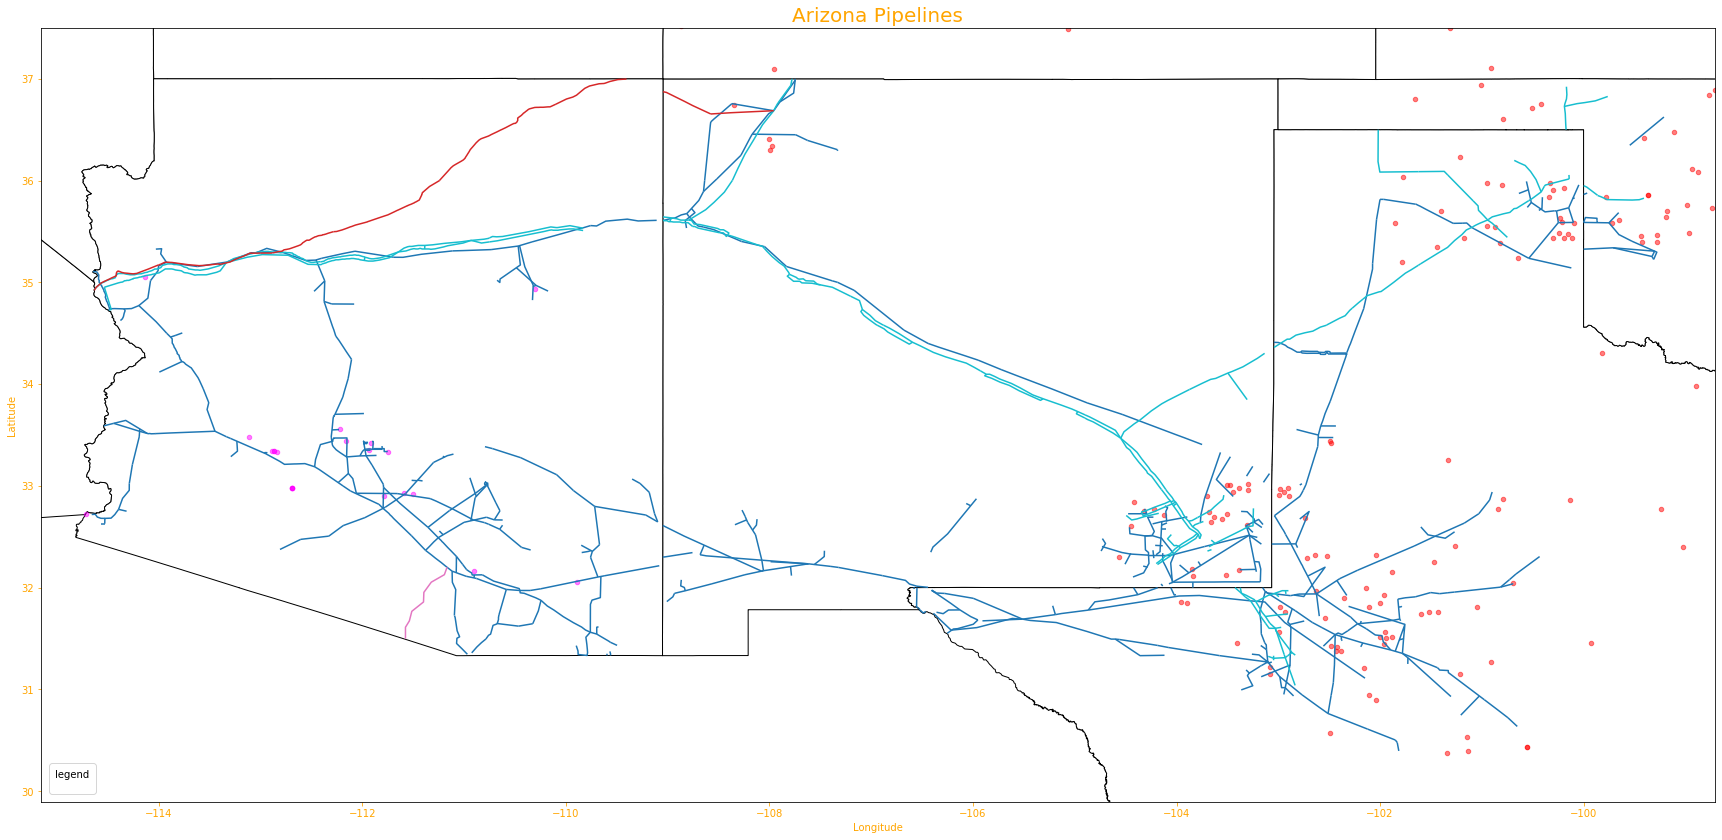

In [90]:
state_of_interest('Arizona', us_mod, shp, processing, plants_geo)